# Work
請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現



In [16]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [17]:
train, test = keras.datasets.cifar10.load_data()

In [18]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [19]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [20]:
#  原nesterov=True, momentum=0.9
#  lr = 0.01 accuracy: 0.8624 - val_loss: 2.4275 - val_acc: 0.5097

#  調整nesterov=False, momentum=0.9
# loss: 0.7004 - accuracy: 0.7515 - val_loss: 1.5468 - val_accuracy: 0.5256


In [21]:
#建立神經網絡
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [22]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [23]:
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
results = {}

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=0.8)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 5s 90us/step - loss: 0.8248 - accuracy: 0.6991 - val_loss: 1.7589 - val_accuracy: 0.4910
Epoch 50/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.8070 - accuracy: 0.7077 - val_loss: 1.8235 - val_accuracy: 0.4980
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_______________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 5s 99us/step - loss: 0.7437 - accuracy: 0.7367 - val_loss: 1.4986 - val_accuracy: 0.5266
Epoch 48/50
50000/50000 [==============================] - 5s 98us/step - loss: 0.7253 - accuracy: 0.7434 - val_loss: 1.5798 - val_accuracy: 0.5138
Epoch 49/50
50000/50000 [==============================] - 5s 97us/step - loss: 0.7206 - accuracy: 0.7472 - val_loss: 1.5723 - val_accuracy: 0.5181
Epoch 50/50
50000/50000 [==============================] - 5s 97us/step - loss: 0.7004 - accuracy: 0.7515 - val_loss: 1.5468 - val_accuracy: 0.5256
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_______________________________

Epoch 45/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.3755 - accuracy: 0.5190 - val_loss: 1.4450 - val_accuracy: 0.4904
Epoch 46/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.3677 - accuracy: 0.5194 - val_loss: 1.4350 - val_accuracy: 0.4915
Epoch 47/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.3618 - accuracy: 0.5233 - val_loss: 1.4451 - val_accuracy: 0.4891
Epoch 48/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.3552 - accuracy: 0.5253 - val_loss: 1.4376 - val_accuracy: 0.4937
Epoch 49/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.3512 - accuracy: 0.5263 - val_loss: 1.4322 - val_accuracy: 0.4939
Epoch 50/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.3448 - accuracy: 0.5304 - val_loss: 1.4227 - val_accuracy: 0.4954
Experiment with LR = 0.000100
Model: "model_1"
________________________________________________________________

50000/50000 [==============================] - 5s 102us/step - loss: 1.8181 - accuracy: 0.3691 - val_loss: 1.8227 - val_accuracy: 0.3659
Epoch 43/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.8147 - accuracy: 0.3712 - val_loss: 1.8195 - val_accuracy: 0.3658
Epoch 44/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.8112 - accuracy: 0.3717 - val_loss: 1.8165 - val_accuracy: 0.3670
Epoch 45/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.8079 - accuracy: 0.3734 - val_loss: 1.8132 - val_accuracy: 0.3685
Epoch 46/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.8047 - accuracy: 0.3746 - val_loss: 1.8101 - val_accuracy: 0.3679
Epoch 47/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.8015 - accuracy: 0.3750 - val_loss: 1.8071 - val_accuracy: 0.3697
Epoch 48/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.7983 - accuracy: 0.3765 - val_loss: 1.804

Epoch 40/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.1564 - accuracy: 0.2510 - val_loss: 2.1536 - val_accuracy: 0.2543
Epoch 41/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.1535 - accuracy: 0.2524 - val_loss: 2.1508 - val_accuracy: 0.2558
Epoch 42/50
50000/50000 [==============================] - 5s 100us/step - loss: 2.1507 - accuracy: 0.2539 - val_loss: 2.1480 - val_accuracy: 0.2581
Epoch 43/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.1479 - accuracy: 0.2547 - val_loss: 2.1452 - val_accuracy: 0.2587
Epoch 44/50
50000/50000 [==============================] - 5s 102us/step - loss: 2.1452 - accuracy: 0.2560 - val_loss: 2.1425 - val_accuracy: 0.2605
Epoch 45/50
50000/50000 [==============================] - 5s 98us/step - loss: 2.1425 - accuracy: 0.2576 - val_loss: 2.1398 - val_accuracy: 0.2610
Epoch 46/50
50000/50000 [==============================] - 5s 101us/step - loss: 2.1398 - accuracy: 0.2591 -

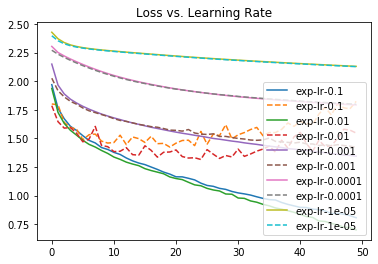

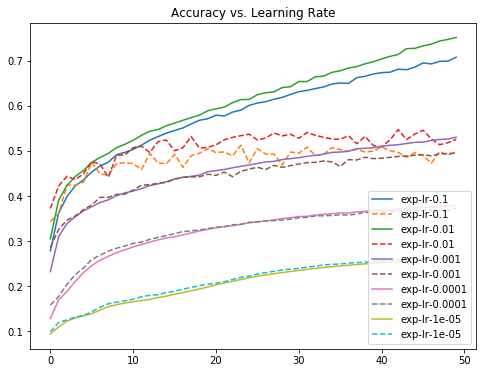

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline 
    
#NUM_COLORS = len(results.keys())
#cm = plt.get_cmap('gist_rainbow')
#color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

#plt.figure(figsize=(8,6))
for i, j in enumerate(results.keys()):
    plt.plot(range(len(results[j]['train-loss'])),results[j]['train-loss'], '-', label=j)
    plt.plot(range(len(results[j]['valid-loss'])),results[j]['valid-loss'], '--', label=j)
plt.title("Loss vs. Learning Rate")
plt.legend(loc=4)
plt.show()

plt.figure(figsize=(8,6))
for i, j in enumerate(results.keys()):
    plt.plot(range(len(results[j]['train-acc'])),results[j]['train-acc'], '-', label=j)
    plt.plot(range(len(results[j]['valid-acc'])),results[j]['valid-acc'], '--', label=j)
plt.title("Accuracy vs. Learning Rate")
plt.legend(loc=4)
plt.show()

In [25]:
#  nesterov=False, momentum=0.8
#  loss: 0.7039 - accuracy: 0.7537 - val_loss: 1.4896 - val_accuracy: 0.5337

In [26]:
 #建立神經網絡
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [27]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [28]:
results = {}

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=0.8)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 6s 118us/step - loss: 0.8462 - accuracy: 0.6933 - val_loss: 1.7769 - val_accuracy: 0.5058
Epoch 50/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.8363 - accuracy: 0.6991 - val_loss: 1.8057 - val_accuracy: 0.4892
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 5s 97us/step - loss: 0.7371 - accuracy: 0.7407 - val_loss: 1.4848 - val_accuracy: 0.5273
Epoch 48/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.7271 - accuracy: 0.7455 - val_loss: 1.4493 - val_accuracy: 0.5364
Epoch 49/50
50000/50000 [==============================] - 5s 99us/step - loss: 0.7107 - accuracy: 0.7479 - val_loss: 1.4604 - val_accuracy: 0.5356
Epoch 50/50
50000/50000 [==============================] - 5s 100us/step - loss: 0.7039 - accuracy: 0.7537 - val_loss: 1.4896 - val_accuracy: 0.5337
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_____________________________

Epoch 45/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.3726 - accuracy: 0.5181 - val_loss: 1.4455 - val_accuracy: 0.4897
Epoch 46/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.3665 - accuracy: 0.5217 - val_loss: 1.4382 - val_accuracy: 0.4952
Epoch 47/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.3600 - accuracy: 0.5221 - val_loss: 1.4285 - val_accuracy: 0.4939
Epoch 48/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.3546 - accuracy: 0.5245 - val_loss: 1.4319 - val_accuracy: 0.4910
Epoch 49/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.3474 - accuracy: 0.5283 - val_loss: 1.4260 - val_accuracy: 0.4954
Epoch 50/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.3436 - accuracy: 0.5279 - val_loss: 1.4190 - val_accuracy: 0.4974
Experiment with LR = 0.000100
Model: "model_1"
____________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.8168 - accuracy: 0.3636 - val_loss: 1.8154 - val_accuracy: 0.3656
Epoch 44/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.8133 - accuracy: 0.3667 - val_loss: 1.8123 - val_accuracy: 0.3685
Epoch 45/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.8099 - accuracy: 0.3667 - val_loss: 1.8088 - val_accuracy: 0.3703
Epoch 46/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.8066 - accuracy: 0.3678 - val_loss: 1.8057 - val_accuracy: 0.3695
Epoch 47/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.8034 - accuracy: 0.3689 - val_loss: 1.8027 - val_accuracy: 0.3713
Epoch 48/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.8003 - accuracy: 0.3698 - val_loss: 1.7995 - val_accuracy: 0.3740
Epoch 49/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.7972 - accuracy: 0.3709 - 

Epoch 41/50
50000/50000 [==============================] - 4s 90us/step - loss: 2.1515 - accuracy: 0.2369 - val_loss: 2.1526 - val_accuracy: 0.2322
Epoch 42/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.1487 - accuracy: 0.2376 - val_loss: 2.1499 - val_accuracy: 0.2331
Epoch 43/50
50000/50000 [==============================] - 5s 90us/step - loss: 2.1460 - accuracy: 0.2388 - val_loss: 2.1472 - val_accuracy: 0.2345
Epoch 44/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.1433 - accuracy: 0.2392 - val_loss: 2.1445 - val_accuracy: 0.2353
Epoch 45/50
50000/50000 [==============================] - 5s 90us/step - loss: 2.1406 - accuracy: 0.2406 - val_loss: 2.1419 - val_accuracy: 0.2376
Epoch 46/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.1380 - accuracy: 0.2418 - val_loss: 2.1393 - val_accuracy: 0.2388
Epoch 47/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.1354 - accuracy: 0.2427 - val_

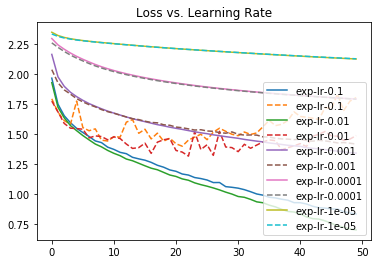

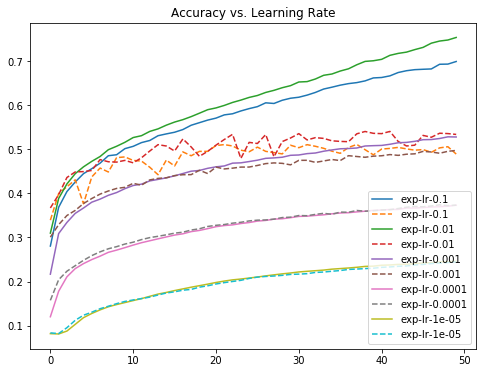

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline 
    
#NUM_COLORS = len(results.keys())
#cm = plt.get_cmap('gist_rainbow')
#color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

#plt.figure(figsize=(8,6))
for i, j in enumerate(results.keys()):
    plt.plot(range(len(results[j]['train-loss'])),results[j]['train-loss'], '-', label=j)
    plt.plot(range(len(results[j]['valid-loss'])),results[j]['valid-loss'], '--', label=j)
plt.title("Loss vs. Learning Rate")
plt.legend(loc=4)
plt.show()

plt.figure(figsize=(8,6))
for i, j in enumerate(results.keys()):
    plt.plot(range(len(results[j]['train-acc'])),results[j]['train-acc'], '-', label=j)
    plt.plot(range(len(results[j]['valid-acc'])),results[j]['valid-acc'], '--', label=j)
plt.title("Accuracy vs. Learning Rate")
plt.legend(loc=4)
plt.show()

In [ ]:
#  nesterov=False, momentum=0.95
#  loss: 0.6900 - accuracy: 0.7555 - val_loss: 1.4757 - val_accuracy: 0.5333

In [30]:
 #建立神經網絡
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [31]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [32]:
results = {}

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=0.8)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 10s 203us/step - loss: 0.9450 - accuracy: 0.6580 - val_loss: 1.6465 - val_accuracy: 0.4872
Epoch 49/50
50000/50000 [==============================] - 10s 205us/step - loss: 0.9360 - accuracy: 0.6612 - val_loss: 1.6930 - val_accuracy: 0.4868
Epoch 50/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.9393 - accuracy: 0.6590 - val_loss: 1.6872 - val_accuracy: 0.4964
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

Epoch 46/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.7508 - accuracy: 0.7339 - val_loss: 1.4857 - val_accuracy: 0.5348
Epoch 47/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.7267 - accuracy: 0.7426 - val_loss: 1.5954 - val_accuracy: 0.5038
Epoch 48/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.7182 - accuracy: 0.7485 - val_loss: 1.6445 - val_accuracy: 0.5012
Epoch 49/50
50000/50000 [==============================] - 5s 98us/step - loss: 0.7016 - accuracy: 0.7523 - val_loss: 1.4750 - val_accuracy: 0.5392
Epoch 50/50
50000/50000 [==============================] - 5s 91us/step - loss: 0.6900 - accuracy: 0.7555 - val_loss: 1.4757 - val_accuracy: 0.5333
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_______________

Epoch 44/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.3904 - accuracy: 0.5133 - val_loss: 1.4482 - val_accuracy: 0.4815
Epoch 45/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.3844 - accuracy: 0.5130 - val_loss: 1.4431 - val_accuracy: 0.4853
Epoch 46/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.3766 - accuracy: 0.5169 - val_loss: 1.4374 - val_accuracy: 0.4928
Epoch 47/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.3733 - accuracy: 0.5187 - val_loss: 1.4378 - val_accuracy: 0.4906
Epoch 48/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.3669 - accuracy: 0.5207 - val_loss: 1.4417 - val_accuracy: 0.4870
Epoch 49/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.3611 - accuracy: 0.5222 - val_loss: 1.4209 - val_accuracy: 0.4940
Epoch 50/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.3543 - accuracy: 0.525

50000/50000 [==============================] - 12s 232us/step - loss: 1.8213 - accuracy: 0.3681 - val_loss: 1.8237 - val_accuracy: 0.3631
Epoch 42/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.8178 - accuracy: 0.3698 - val_loss: 1.8201 - val_accuracy: 0.3662
Epoch 43/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.8144 - accuracy: 0.3703 - val_loss: 1.8166 - val_accuracy: 0.3670
Epoch 44/50
50000/50000 [==============================] - 12s 247us/step - loss: 1.8111 - accuracy: 0.3706 - val_loss: 1.8136 - val_accuracy: 0.3698
Epoch 45/50
50000/50000 [==============================] - 14s 282us/step - loss: 1.8080 - accuracy: 0.3725 - val_loss: 1.8109 - val_accuracy: 0.3685
Epoch 46/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.8048 - accuracy: 0.3739 - val_loss: 1.8073 - val_accuracy: 0.3668
Epoch 47/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.8016 - accuracy: 0.3732 - va

Epoch 39/50
50000/50000 [==============================] - 8s 165us/step - loss: 2.1295 - accuracy: 0.2431 - val_loss: 2.1278 - val_accuracy: 0.2407
Epoch 40/50
50000/50000 [==============================] - 11s 217us/step - loss: 2.1266 - accuracy: 0.2447 - val_loss: 2.1249 - val_accuracy: 0.2417
Epoch 41/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.1238 - accuracy: 0.2460 - val_loss: 2.1221 - val_accuracy: 0.2438
Epoch 42/50
50000/50000 [==============================] - 11s 215us/step - loss: 2.1210 - accuracy: 0.2476 - val_loss: 2.1193 - val_accuracy: 0.2456
Epoch 43/50
50000/50000 [==============================] - 11s 211us/step - loss: 2.1182 - accuracy: 0.2489 - val_loss: 2.1166 - val_accuracy: 0.2465
Epoch 44/50
50000/50000 [==============================] - 19s 372us/step - loss: 2.1155 - accuracy: 0.2497 - val_loss: 2.1139 - val_accuracy: 0.2481
Epoch 45/50
50000/50000 [==============================] - 18s 365us/step - loss: 2.1128 - accuracy: 0

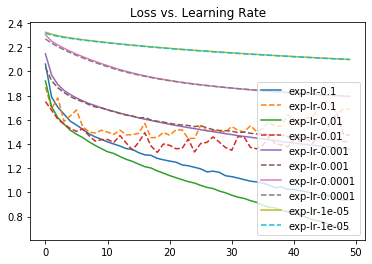

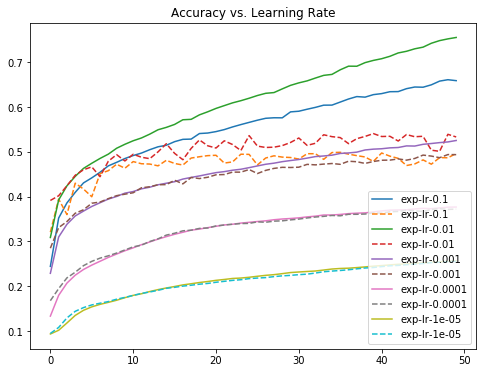

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline 
    
#NUM_COLORS = len(results.keys())
#cm = plt.get_cmap('gist_rainbow')
#color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

#plt.figure(figsize=(8,6))
for i, j in enumerate(results.keys()):
    plt.plot(range(len(results[j]['train-loss'])),results[j]['train-loss'], '-', label=j)
    plt.plot(range(len(results[j]['valid-loss'])),results[j]['valid-loss'], '--', label=j)
plt.title("Loss vs. Learning Rate")
plt.legend(loc=4)
plt.show()

plt.figure(figsize=(8,6))
for i, j in enumerate(results.keys()):
    plt.plot(range(len(results[j]['train-acc'])),results[j]['train-acc'], '-', label=j)
    plt.plot(range(len(results[j]['valid-acc'])),results[j]['valid-acc'], '--', label=j)
plt.title("Accuracy vs. Learning Rate")
plt.legend(loc=4)
plt.show()

#學習率為0.01 =>模型最優準確率

原nesterov=True, momentum=0.9
loss: 0.3792-accuracy: 0.8624 - val_loss: 2.4275 - val_acc: 0.509

調整nesterov=False, momentum=0.9
loss: 0.7004 - accuracy: 0.7515 - val_loss: 1.5468 - val_accuracy: 0.5256

調整nesterov=False, momentum=0.8
loss: 0.7039 - accuracy: 0.7537 - val_loss: 1.4896 - val_accuracy: 0.5337

調整nesterov=False, momentum=0.95
loss: 0.6900 - accuracy: 0.7555 - val_loss: 1.4757 - val_accuracy: 0.5333

<h1>由上述可知,使用nesterov校正,能使模型有較高準確率,但泛化能力則無明顯提升反而下降.</h1>

#參考資料：https://blog.csdn.net/u012328159/article/details/80311892